In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df= pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Shape of data
df.shape

(42000, 785)

In [4]:
# sample of data
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40241,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35213,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7261,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26383,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16444,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [19]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [5]:
import matplotlib.pyplot as plt

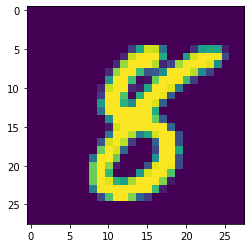

In [10]:
plt.imshow(df.iloc[40241,1:].values.reshape(28,28))

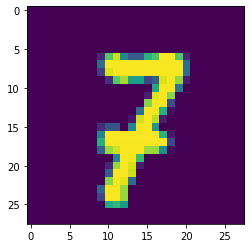

In [11]:
plt.imshow(df.iloc[7261,1:].values.reshape(28,28))

In [12]:
# Spliting data into  input and output variables
X= df.iloc[:, 1:]
y= df.iloc[:, 0]

In [16]:
# Spliting data into train and test split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=123)

In [17]:
X_train.shape

(33600, 784)

In [20]:
# Let's fit the model without applying the PCA
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
# Lets check the time taken by algorithm to solve the problem
import time
start= time.time()
y_pred = knn.predict(X_test)
print('Time taken by algorithm without PCA',time.time() - start)

Time taken by algorithm without PCA 10.901662588119507


In [27]:
acc = accuracy_score(y_test, y_pred)
acc

0.9665476190476191

In [28]:
# Lets approach the problem by the PCA
# 1. Scaling the data before applying the PCA

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [29]:
# Appying the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)


X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [30]:
X_train_trf.shape

(33600, 100)

In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [33]:
start = time.time()
y_pred = knn.predict(X_test_trf)
print('Time taken by algorithm with PCA :', time.time() - start)

Time taken by algorithm with PCA : 7.0286641120910645


It can be seen that the time taken by algorithm with PCA is substatially lower as compared with without PCA. Meaning, PCA has lower the computations required due to reduced features and the time taken for those computations.

In [34]:
acc = accuracy_score(y_test, y_pred)
acc

0.9528571428571428

It can be seen that the accuracy has been reduced little by the  PCA but has not made the substantial impact on the performace of model

In [37]:
# Lets find the optimum PCAs
pcas = [1,10, 50, 100, 150, 200, 225, 250, 300, 350, 400, 500, 550, 600, 700 ]
for i in pcas:
    pca = PCA(n_components = i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf, y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print('Accuracy with {} PCAs is {}'.format(i, accuracy_score(y_test, y_pred)))
    

Accuracy with 1 PCAs is 0.25345238095238093
Accuracy with 10 PCAs is 0.9058333333333334
Accuracy with 50 PCAs is 0.9539285714285715
Accuracy with 100 PCAs is 0.9532142857142857
Accuracy with 150 PCAs is 0.950595238095238
Accuracy with 200 PCAs is 0.9461904761904761
Accuracy with 225 PCAs is 0.9451190476190476
Accuracy with 250 PCAs is 0.9434523809523809
Accuracy with 300 PCAs is 0.9417857142857143
Accuracy with 350 PCAs is 0.9410714285714286
Accuracy with 400 PCAs is 0.9398809523809524
Accuracy with 500 PCAs is 0.9372619047619047
Accuracy with 550 PCAs is 0.9372619047619047
Accuracy with 600 PCAs is 0.9366666666666666
Accuracy with 700 PCAs is 0.9366666666666666


In [39]:
# lets find the optimum PCAs for out problem
pca= PCA(n_components = None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [45]:
# PCA components
pca.components_
# (Eigen vectors)

array([[ 4.77972636e-19,  1.11022302e-16, -2.22044605e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.57327422e-19, -8.32667268e-17,  5.55111512e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 7.57351311e-19,  1.66533454e-16,  5.55111512e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [-0.00000000e+00,  1.85239479e-01, -7.23885585e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  2.27904022e-02,  2.90467247e-03, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00, -2.14774812e-01,  3.82443373e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [46]:
# lets see the cumulative variance by PCAs
np.cumsum(pca.explained_variance_ratio_)

array([0.05828913, 0.09976011, 0.13769358, 0.16715273, 0.19295985,
       0.21549119, 0.23524676, 0.25305281, 0.26887594, 0.2831814 ,
       0.29688398, 0.3092365 , 0.32072804, 0.33190226, 0.34250026,
       0.35268595, 0.36223537, 0.37162473, 0.38075501, 0.38960009,
       0.39801339, 0.40616028, 0.41399242, 0.42156039, 0.42888714,
       0.43592934, 0.44288957, 0.44961759, 0.45596107, 0.46216206,
       0.4682923 , 0.47432972, 0.48014272, 0.48592813, 0.49154464,
       0.49703783, 0.50246203, 0.50773711, 0.51284697, 0.51784538,
       0.52277184, 0.52760279, 0.53232338, 0.53699834, 0.54155579,
       0.54608345, 0.55056514, 0.5550055 , 0.55939027, 0.56365569,
       0.56786673, 0.57198167, 0.57607731, 0.58010886, 0.58409019,
       0.58806006, 0.59195728, 0.59581349, 0.599582  , 0.6032907 ,
       0.60696639, 0.61055855, 0.61409689, 0.61757269, 0.62103153,
       0.62447195, 0.62788224, 0.63124148, 0.63452585, 0.63776948,
       0.64093228, 0.64405893, 0.6471762 , 0.65024989, 0.65329

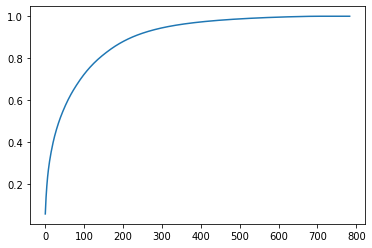

In [47]:
# lets plot the same
plt.plot(np.cumsum(pca.explained_variance_ratio_))

It can be ssen that we are getting around 95 accuracy by considering the 400 PCAs. hence we will model using PCA=400. 

In [48]:
pca= PCA(n_components = 400)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

knn = KNeighborsClassifier()
    
knn.fit(X_train_trf, y_train)
    
y_pred = knn.predict(X_test_trf)
    
acc =  accuracy_score(y_test, y_pred)

In [55]:
# Lets load the test dataset

df1 = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [56]:
df1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df1.shape

(28000, 784)

In [58]:
X_test1 = df1.iloc[:, :]

In [59]:
# scale the test data
X_test1 = scaler.transform(X_test1)

In [60]:
# Apply the PCA

X_test1_trf = pca.transform(X_test1)

In [61]:
# Predict for test data
y_pred_final = knn.predict(X_test1_trf)

In [64]:
answer = df = pd.DataFrame(y_pred_final)

In [67]:
answer = answer.rename(columns={df.columns[0]: 'y_pred'})
answer

,y_pred
0,2
1,0
2,9
3,4
4,3
...,...
27995,9
27996,7
27997,3
27998,9


In [69]:
answer.to_csv('answer.csv')